<a href="https://colab.research.google.com/github/diegosfc91/Advanced-Machine-Learning/blob/main/M%C3%A9tricas_de_Agrupamiento_(K_means_y_DBSCAN)_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos, exploración y preprocesamiento de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Cargar el dataset
file_path = '/content/CC GENERAL.csv'  # Ruta del nuevo dataset

data = pd.read_csv(file_path)

# Exploración inicial
print("\nVista previa de los datos:\n")
print(data.head())

# Limpieza inicial: manejar valores nulos y seleccionar características relevantes
data.dropna(inplace=True)  # Eliminar filas con valores nulos
selected_features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
processed_data = data[selected_features]

# Estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)





Vista previa de los datos:

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1      

# Aplicación de K-means y DBSCAN:

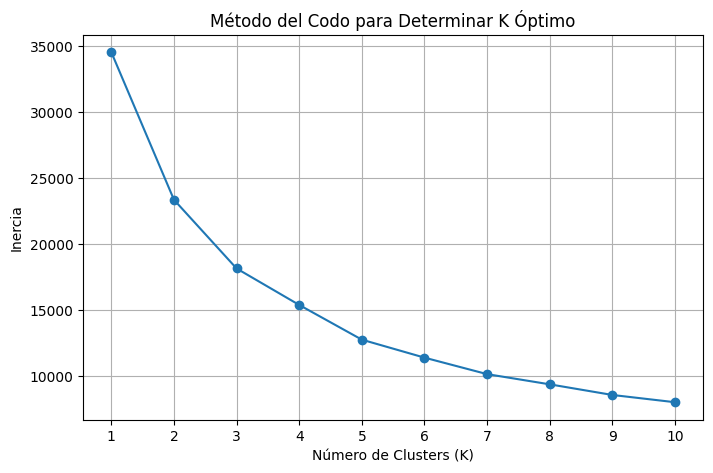


Evaluación de K-Means:
Silhouette Score: 0.40
Calinski-Harabasz Index: 3699.08

Evaluación de DBSCAN:
Silhouette Score: 0.28
Calinski-Harabasz Index: 278.60


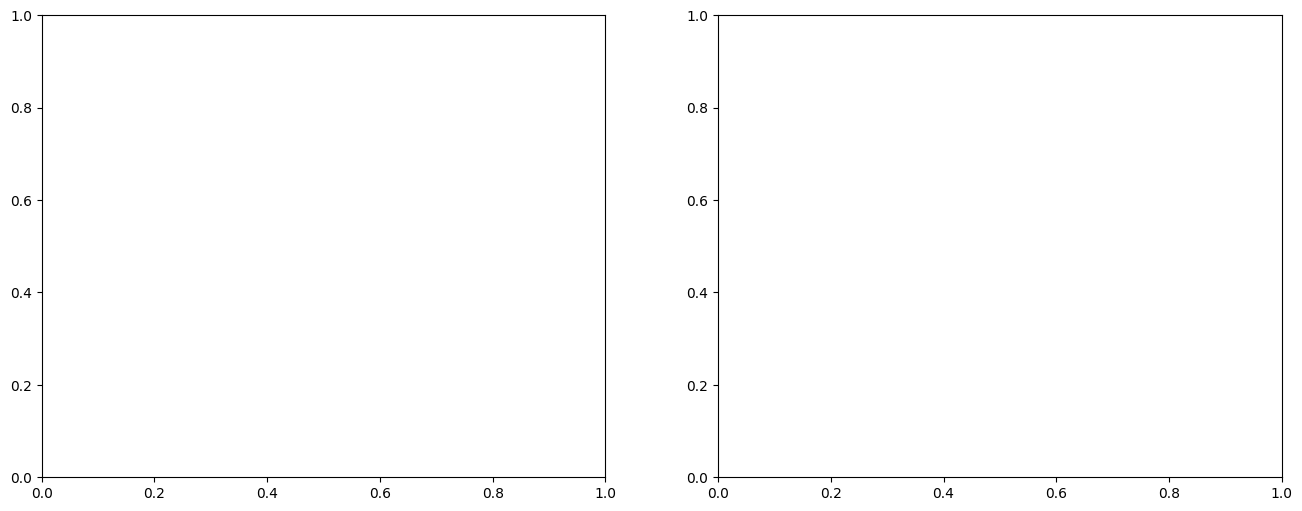

In [ ]:
# K-Means: Método del codo para determinar K óptimo
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Determinar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(np.arange(1, 11, 1))
plt.grid()
plt.show()

# K-Means: Aplicación con K óptimo (por ejemplo, K = 5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)
kmeans_labels = kmeans.predict(scaled_data)

# Evaluación de K-Means
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(scaled_data, kmeans_labels)

print("\nEvaluación de K-Means:")
print(f"Silhouette Score: {kmeans_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {kmeans_calinski:.2f}")

# DBSCAN: Experimentar con diferentes parámetros
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_data)
dbscan_labels = dbscan.labels_

# Evaluación de DBSCAN
dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else None
if dbscan_silhouette:
    print("\nEvaluación de DBSCAN:")
    print(f"Silhouette Score: {dbscan_silhouette:.2f}")
dbscan_calinski = calinski_harabasz_score(scaled_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else None
if dbscan_calinski:
    print(f"Calinski-Harabasz Index: {dbscan_calinski:.2f}")
else:
    print("\nDBSCAN no formó suficientes clusters para calcular las métricas.")

# Visualización comparativa de clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


# Analisis de cada componente

In [ ]:

# Visualización de K-Means
axes[0].scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel(selected_features[0])
axes[0].set_ylabel(selected_features[1])

# Visualización de DBSCAN
axes[1].scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis', s=50)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel(selected_features[0])
axes[1].set_ylabel(selected_features[1])

plt.tight_layout()
plt.show()

# Análisis de clusters y outliers
print("\nAnálisis de resultados:")
print("\nK-Means formó clusters bien definidos según las métricas, pero podría no detectar outliers.")
print("DBSCAN detectó outliers y agrupaciones densas, pero los resultados dependen fuertemente de los parámetros epsilon y min_samples.")


<Figure size 640x480 with 0 Axes>


Análisis de resultados:

K-Means formó clusters bien definidos según las métricas, pero podría no detectar outliers.
DBSCAN detectó outliers y agrupaciones densas, pero los resultados dependen fuertemente de los parámetros epsilon y min_samples.
